In [1]:
import sys
sys.path.append('/home/yja6qa/arepo_package/')
import arepo_package
import scipy.interpolate
radiative_efficiency=0.2
import h5py
%pylab inline
import os
import numpy as np
from brahma_analysis import *
from sklearn.linear_model import LinearRegression

h = 0.6774

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


NameError: name 'x' is not defined

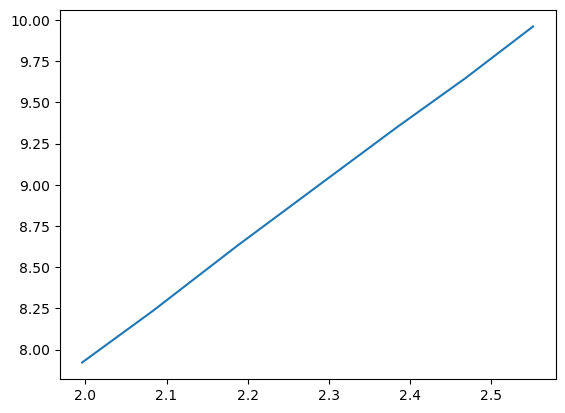

In [2]:
xs = [1.996031746031746, 2.0833333333333335, 2.1865079365079363, 2.2936507936507935, 2.384920634920635, 2.4682539682539684,2.5515873015873014]
ys = [7.921568627450981,8.235294117647058,8.627450980392158,9.019607843137255,9.352941176470589,9.647058823529413,9.96078431372549]
plt.plot(xs,ys,label='top')
plt.plot(x,y[0],label='Illustris?')
plt.plot(x,TNGy[0],label='TNG?')
plt.legend()

In [5]:
Korm_Ho_2013=np.array([1.7222222222222223, 5.980392156862745,1.8611111111111112, 6.568627450980392,1.9801587301587302, 7.098039215686274,2.0912698412698414, 7.568627450980392,2.1666666666666665, 7.901960784313726,2.253968253968254, 8.294117647058824,2.365079365079365, 8.784313725490197,2.492063492063492, 9.333333333333334,2.575396825396825, 9.686274509803923])

model=LinearRegression()

KH13_x = list(np.arange(0,len(Korm_Ho_2013)-2,2))
KH13_y=list(np.arange(1,len(Korm_Ho_2013)-1,2))

modelx=Korm_Ho_2013[KH13_x].reshape(-1, 1)
modely=Korm_Ho_2013[KH13_y].reshape(-1, 1)

model.fit(modelx,modely)

xfit=np.linspace(0.75,2.5,100)
KH13_yfit=model.coef_*x + model.intercept_

In [4]:
modelTNG = LinearRegression()
model=LinearRegression()

Illustris_TNG = np.array([2.587301587301587, 9.627450980392155,2.4761904761904763, 9.352941176470587,2.373015873015873, 
                 9.117647058823529,2.2777777777777777, 8.88235294117647,2.142857142857143, 8.549019607843135,
                 2.0396825396825395, 8.313725490196077,1.996031746031746, 8.196078431372548])

Illustris = np.array([2.5555555555555554, 10.017740429505135,2.4126984126984126, 9.482726423902893,
                      2.317460317460317, 9.126050420168067,2.238095238095238, 8.828820417055711,2.142857142857143, 
                      8.491752256458138,2.0436507936507935, 8.11531279178338,2, 7.9567382508558975])

xs=list(np.arange(0,14,2))
ys=list(np.arange(1,15,2))

modelxTNG=Illustris_TNG[xs].reshape(-1, 1)
modelyTNG=Illustris_TNG[ys].reshape(-1, 1)

modelx=Illustris[xs].reshape(-1, 1)
modely=Illustris[ys].reshape(-1, 1)

modelTNG.fit(modelxTNG,modelyTNG)
model.fit(modelx,modely)

x=np.linspace(0.75,2.5,100)
TNGy=modelTNG.coef_*x + modelTNG.intercept_
y=model.coef_*x + model.intercept_

In [2]:
path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs

outputlist=['output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_ratio10_SFMFGM5_seed5.00_bFOF/',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich']

Property1 = 'GroupMassType'
Property2 = 'GroupBHMass'
redshifts = [5,0]
part=4
Prop1list,Prop2list,outputz_list,limits = load_data(path_to_output,run,outputlist,redshifts,Property1,Property2,part_type=part)

In [3]:
AllBoxMeans,AllBoxStdDevs,Xpoints = mean_trends(Prop1list,Prop2list,redshifts,limits,bins=8)

/sfs/qumulo/qhome/yja6qa/arepo_package/brahma_analysis.py:168: RuntimeWarning: divide by zero encountered in log10
  ids = np.where(np.logical_and(np.log10(Prop1list[i][ii])>=bins[iii],
/sfs/qumulo/qhome/yja6qa/arepo_package/brahma_analysis.py:169: RuntimeWarning: divide by zero encountered in log10
  np.log10(Prop1list[i][ii])<=bins[iii+1]))[0]
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/apps/software/standard/core/ju

(<Figure size 1500x500 with 2 Axes>,
 array([<Axes: title={'center': 'Z=5'}>, <Axes: title={'center': 'Z=0'}>],
       dtype=object))

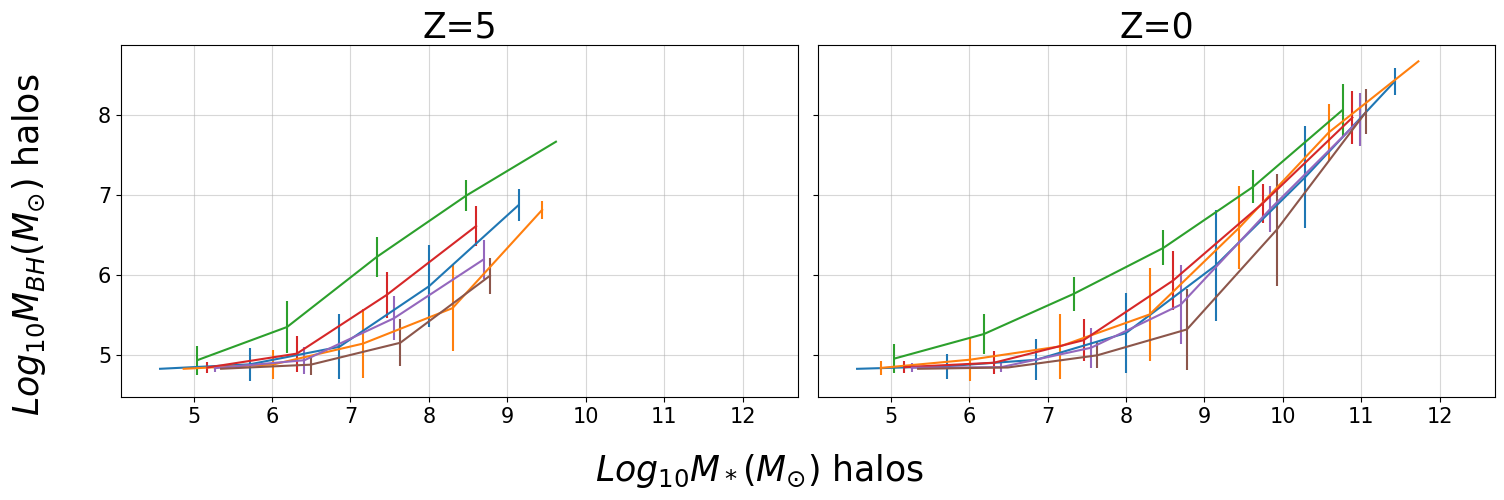

In [4]:
legend_names = ['Mh1000','Mh3000','Standard','LW10','Spin','Rich']
axislabels = ['$Log_{10}M_* (M_{\odot})$ halos','$Log_{10}M_{BH} (M_{\odot})$ halos']

plot_brahma(AllBoxMeans,AllBoxStdDevs,Xpoints,redshifts,legend_names,axislabels,savefig = False)

# Now: Stellar Mass vs BH Accretion Rate

In [5]:
path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs

outputlist=['output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_ratio10_SFMFGM5_seed5.00_bFOF/',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich']

Property1 = 'GroupMassType'
Property2 = 'GroupBHMdot'
redshifts = [5,0]
part_type=4

# (1e10 Msun/h)/(0.978Gyr/h)
conversion2 = 1e10/0.978
SMlist,BH_Mdotlist,outputz_list,limits = load_data(path_to_output,run,outputlist,redshifts,Property1,Property2,part_type,conversion2=conversion2)


In [6]:
MDotMeans,MdotStdDevs,MdotXpoints = mean_trends(SMlist,BH_Mdotlist,redshifts,limits,bins=8)

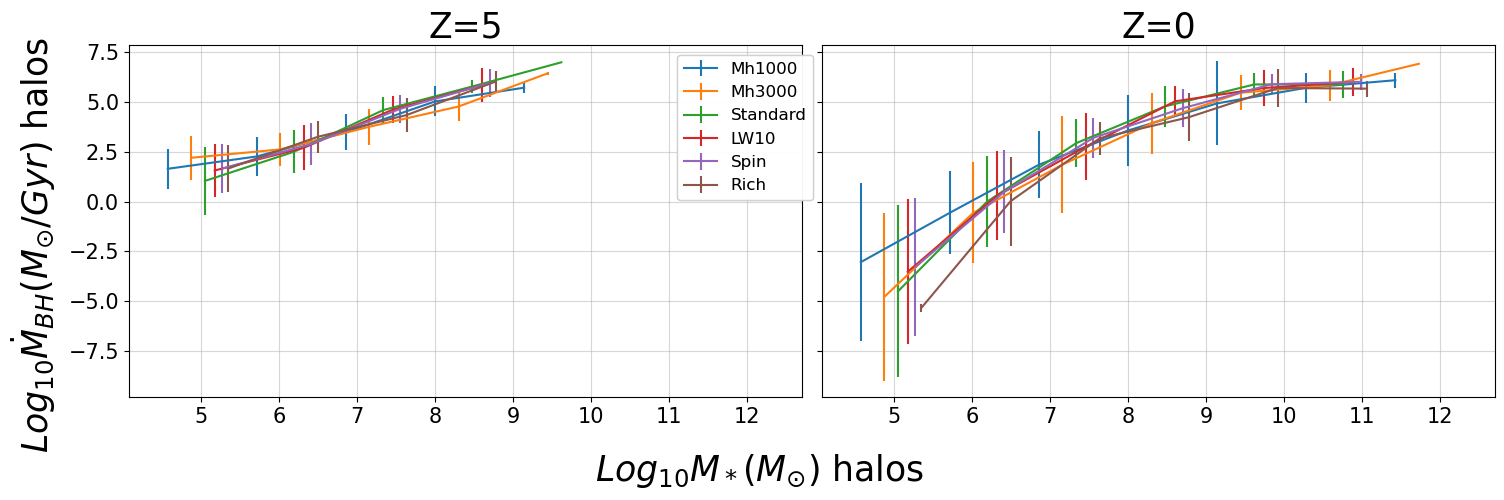

In [7]:
legend_names = ['Mh1000','Mh3000','Standard','LW10','Spin','Rich']
axislabels = ['$Log_{10}M_* (M_{\odot})$ halos','$Log_{10}\dot{M}_{BH} (M_{\odot}/Gyr)$ halos']

f,axes = plot_brahma(MDotMeans,MdotStdDevs,MdotXpoints,redshifts,legend_names,axislabels,savefig = 'BHMdot_Mstars.png')
f.legend(loc = (0.45,0.6),fontsize = 12)

## Converting Mdot to L

From https://ui.adsabs.harvard.edu/abs/2024MNRAS.529.3768B/abstract:

Accreting black holes radiate at bolometric luminosities given by

$L_{bol} = \epsilon_r * \dot{M}_{BH} * c^2$

where $\epsilon_r = 0.2$ is the radiative efficiency.

In [8]:
path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs

outputlist=['output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_ratio10_SFMFGM5_seed5.00_bFOF/',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich']

Property1 = 'GroupMassType'
Property2 = 'GroupBHMdot'
redshifts = [5,0]
part_type=4

# (1e10 Msun/h)/(0.978Gyr/h)
conversion2 = 1e10/0.978
SMlist,Lbollist,outputz_list,limits = load_data(path_to_output,run,outputlist,redshifts,Property1,Property2,
                                                     part_type,conversion2=conversion2,Lbol=[False,True])


In [9]:
LbolMeans,LbolStdDevs,LbolXpoints = mean_trends(SMlist,Lbollist,redshifts,limits,bins=8)

/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


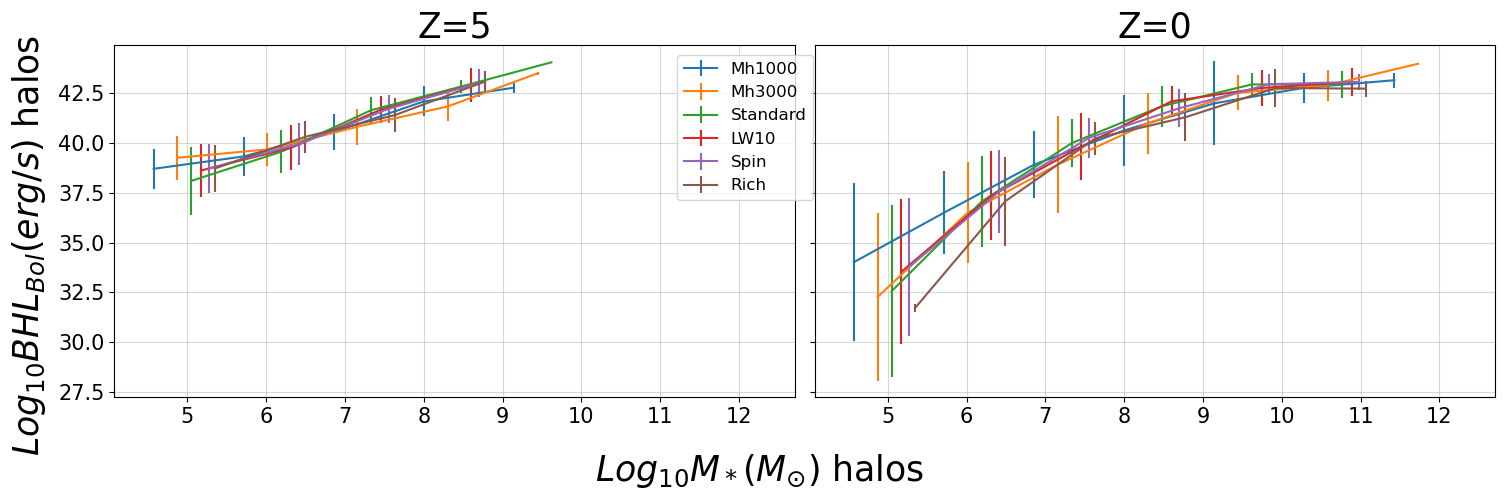

In [10]:
legend_names = ['Mh1000','Mh3000','Standard','LW10','Spin','Rich']
axislabels = ['$Log_{10}M_* (M_{\odot})$ halos','$Log_{10}BH L_{Bol} (erg/s)$ halos']

f,axes = plot_brahma(LbolMeans,LbolStdDevs,LbolXpoints,redshifts,legend_names,axislabels,savefig = 'BH_LBol_Mstars.png')


# Now, BH Mass vs BH Accretion Rate

In [11]:
path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs

outputlist=['output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_ratio10_SFMFGM5_seed5.00_bFOF/',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich']

Property1 = 'GroupMassType'
Property2 = 'GroupBHMdot'
redshifts = [5,0]
part_type=5 # We want BH mass now

# (1e10 Msun/h)/(0.978Gyr/h)
conversion2 = 1e10/0.978
BHMlist,BH_Mdotlist,outputz_list,limits = load_data(path_to_output,run,outputlist,redshifts,Property1,Property2,part_type,conversion2=conversion2)


In [12]:
BHMMeans,MdotStdDevs,MdotXpoints = mean_trends(BHMlist,BH_Mdotlist,redshifts,limits,bins=8)

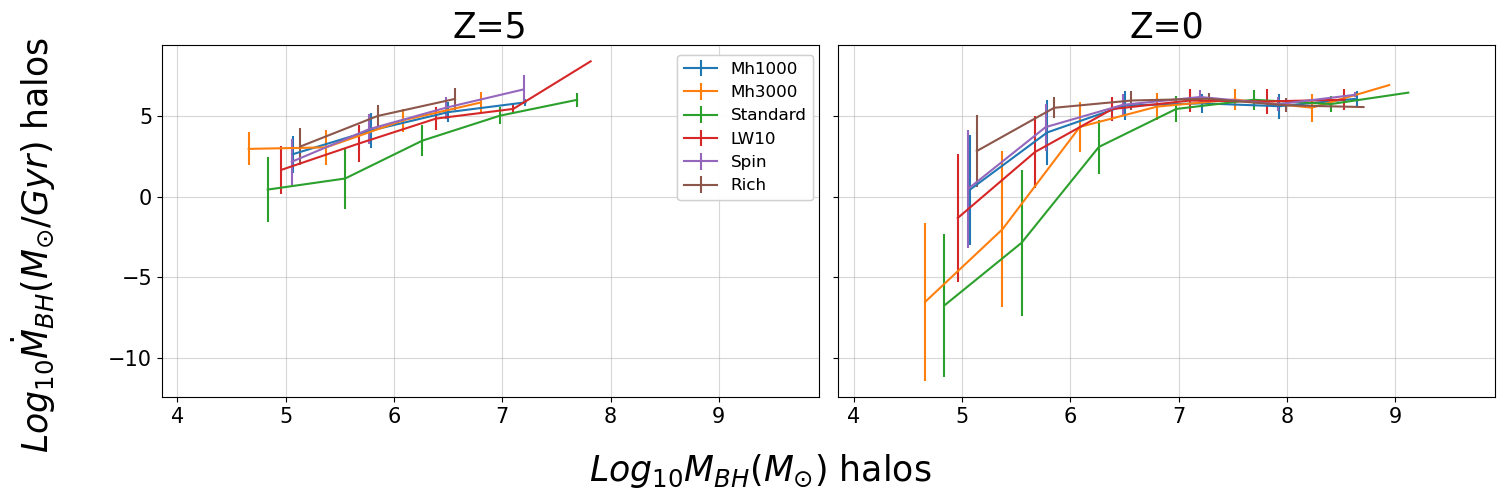

In [13]:
legend_names = ['Mh1000','Mh3000','Standard','LW10','Spin','Rich']
axislabels = ['$Log_{10}M_{BH} (M_{\odot})$ halos','$Log_{10}\dot{M}_{BH} (M_{\odot}/Gyr)$ halos']

f,axes = plot_brahma(BHMMeans,MdotStdDevs,MdotXpoints,redshifts,legend_names,axislabels,savefig = 'BHMdot_MBH.png')
f.legend(loc = (0.45,0.6),fontsize = 12)

# Getting Particle Properties

List of fields for star particles:

['count', 'BirthDensity', 'BirthPos', 'BirthVel', 'Coordinates', 'GFM_InitialMass', 'GFM_Metallicity', 'GFM_Metals', 'GFM_MetalsTagged', 'GFM_StellarFormationTime', 'GFM_StellarPhotometrics','HostHaloMass', 'IsThisTheMinPotential', 'Masses', 'Parent_GasID', 'ParticleIDs', 'Potential', 'SeedMass', 'Spawned','StellarAgeGyr','SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities', 'no_of_BHs_ngb']

In [5]:
### See arepo_package line 271

path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs

outputlist=['output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_ratio10_SFMFGM5_seed5.00_bFOF/',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich']

output_path = path_to_output + run + outputlist[2]
particle_property = None # Should grab all fields, see snapshot.py line 213
p_type = 4 # Stars
desired_redshift = 5

particles, redshifts = arepo_package.get_particle_property(output_path,particle_property,p_type,desired_redshift)


Desired redshift:  5
Output redshift:  4.995933468164624
Output snapshot:  20


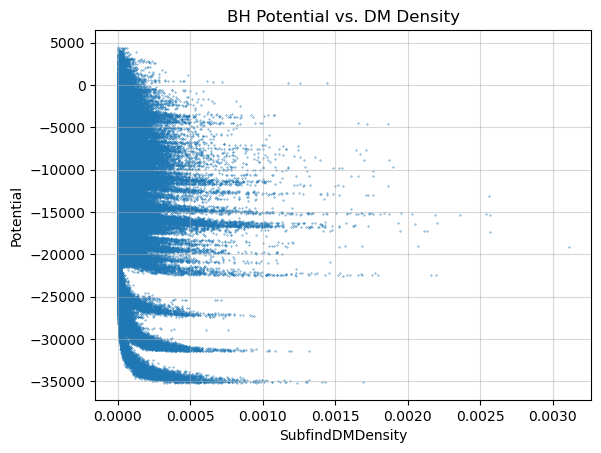

In [27]:
plt.scatter(particles['SubfindDMDensity'],particles['Potential'],s = 0.1)
plt.xlabel('SubfindDMDensity')
plt.ylabel('Potential')
plt.title('BH Potential vs. DM Density')
plt.grid(alpha = 0.5)
plt.savefig('BH_particle_img.png')

## BH Mass vs # Progenitors

In [23]:
### See arepo_package line 271

path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs

outputlist=['output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_ratio10_SFMFGM5_seed5.00_bFOF/',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich']

output_path = path_to_output + run + outputlist[2]
particle_property = None # Should grab all fields, see snapshot.py line 213
p_type = 5 # BHs
desired_redshift1 = 5
desired_redshift2 = 0

particles, redshifts = arepo_package.get_particle_property(output_path,particle_property,p_type,desired_redshift1)
particles2, redshifts = arepo_package.get_particle_property(output_path,particle_property,p_type,desired_redshift2)

Desired redshift:  5
Output redshift:  4.995933468164624
Output snapshot:  20
Desired redshift:  0
Output redshift:  2.220446049250313e-16
Output snapshot:  32


In [28]:
BH_Mass1 = particles['BH_Mass']*1e10*0.6774
BH_Mass2 = particles2['BH_Mass']*1e10*0.6774

N_Prog1 = particles['BH_Progs']
N_Prog2 = particles2['BH_Progs']

BH_Mass_from_Mergers1 = (particles['BH_Mass']-particles['BH_CumMassGrowth_QM']-particles['BH_CumMassGrowth_RM'])*1e10*0.6774
BH_Mass_from_Mergers2 = (particles2['BH_Mass']-particles2['BH_CumMassGrowth_QM']-particles2['BH_CumMassGrowth_RM'])*1e10*0.6774

Merger_Frac1 = BH_Mass_from_Mergers1/BH_Mass1
Merger_Frac2 = BH_Mass_from_Mergers2/BH_Mass2


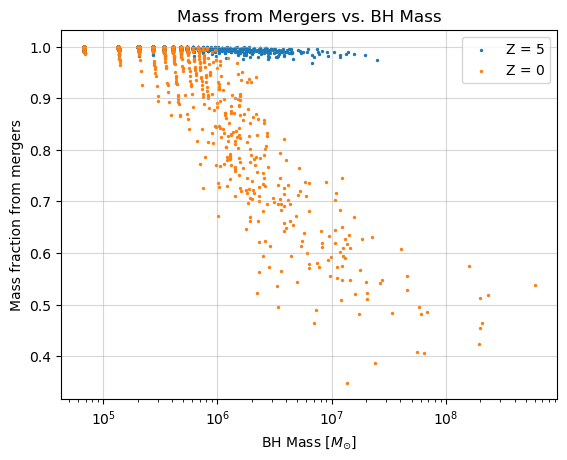

In [35]:
f,ax = plt.subplots(1,1)
ax.scatter(BH_Mass1,Merger_Frac1,s = 2,label = 'Z = 5')
ax.scatter(BH_Mass2,Merger_Frac2,s = 2,label = 'Z = 0')
ax.set_xscale('log')
ax.set_xlabel('BH Mass $[M_{\odot}]$')
ax.set_ylabel('Mass fraction from mergers')
ax.set(title='Mass from Mergers vs. BH Mass')
ax.grid(alpha = 0.5)
ax.legend()
plt.savefig('Merger_Mass_vs_BH_Mass.png')

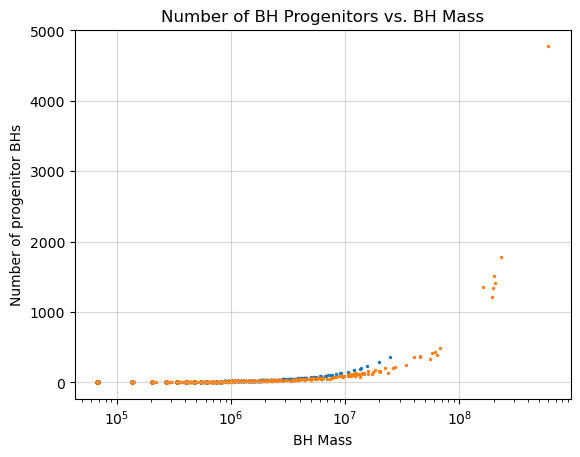

In [25]:
f,ax = plt.subplots(1,1)
ax.scatter(BH_Mass1,N_Prog1,s = 2,label = 'Z = 5')
ax.scatter(BH_Mass2,N_Prog2,s = 2,label = 'Z = 0')
ax.set_xscale('log')
ax.set_xlabel('BH Mass')
ax.set_ylabel('Number of progenitor BHs')
ax.set(title='Number of BH Progenitors vs. BH Mass')
ax.grid(alpha = 0.5)
plt.savefig('N_Progenitors_vs_BH_Mass.png')

## Gas particle data

In [2]:
# ### See arepo_package line 271

# path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
# run='/AREPO/' # name of the simulation runs

# outputlist=['output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6',
#             'output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6',
#             'output_ratio10_SFMFGM5_seed5.00_bFOF/',
#             'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10',
#             'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin',
#             'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich']

# output_path = path_to_output + run + outputlist[2]
# particle_property = None # Should grab all fields, see snapshot.py line 213
# p_type = 1 # Gas
# desired_redshift = 5

# # This causes my kernel to die when using 1 core; runs properly with 6 cores
# particles, redshifts = arepo_package.get_particle_property(output_path,particle_property,p_type,desired_redshift)


Desired redshift:  5
Output redshift:  4.995933468164624
Output snapshot:  20


# Plotting parent halo DM dist, subhalo stellar dist, central MBH Pos

In [6]:
#-----------------Path of the simulation----------------
path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output

#----------------Assign redshift snapshot and particle type we want to select
desired_redshift=0
p_type1=4       # Grabbing stellar particles
p_type2=0       # Grabbing DM particles
p_type3=5       # Grabbing BH pparticles

#----------------Get the subhalo catalog and select only those subhalos that have enough stars
SubhaloLenType,o = arepo_package.get_subhalo_property(basePath,'SubhaloLenType',desired_redshift,postprocessed=1)
SubhaloSMLen = SubhaloLenType[:,p_type1]
SubhaloIndices = numpy.arange(0,len(SubhaloSMLen))
mask= SubhaloSMLen>100
SubhaloIndicesWithStars = SubhaloIndices[mask]

#---------------Select the desired index on the masked catalog, 
desired_index = 100 # Randomly selecting an index

#---------------Assign the true index of the subhalo to be selected 
ActualSubhaloIndex = SubhaloIndicesWithStars[desired_index]

#---------------Retrieve the coordinates of the subhalo and the coordinates of the parent group
StarCoordinates_subhalo,StarCoordinates_group,Staroutput_redshift=arepo_package.get_particle_property_within_postprocessed_groups(basePath,'Coordinates',p_type1,desired_redshift,ActualSubhaloIndex,store_all_offsets=1,group_type='subhalo')
DMCoordinates_subhalo,DMCoordinates_group,DMoutput_redshift=arepo_package.get_particle_property_within_postprocessed_groups(basePath,'Coordinates',p_type2,desired_redshift,ActualSubhaloIndex,store_all_offsets=1,group_type='subhalo')
BHCoordinates_subhalo,BHCoordinates_group,BHoutput_redshift=arepo_package.get_particle_property_within_postprocessed_groups(basePath,'Coordinates',p_type3,desired_redshift,ActualSubhaloIndex,store_all_offsets=1,group_type='subhalo')
BHMasses_subhalo,BHMasses_group,BHoutput_redshift=arepo_package.get_particle_property_within_postprocessed_groups(basePath,'Masses',p_type3,desired_redshift,ActualSubhaloIndex,store_all_offsets=1,group_type='subhalo')

h=0.6774
SubHaloMass,o = arepo_package.get_subhalo_property(basePath,'SubhaloMassType',desired_redshift,postprocessed=1)
SubhaloStellarMass = SubHaloMass[:,4][ActualSubhaloIndex]*1e10/h

BHcoord=BHCoordinates_subhalo[np.argmax(BHMasses_subhalo)]

print(SubhaloStellarMass*1e-8)

offsets were already there
offsets were already there
offsets were already there
offsets were already there
1.3630446195074475


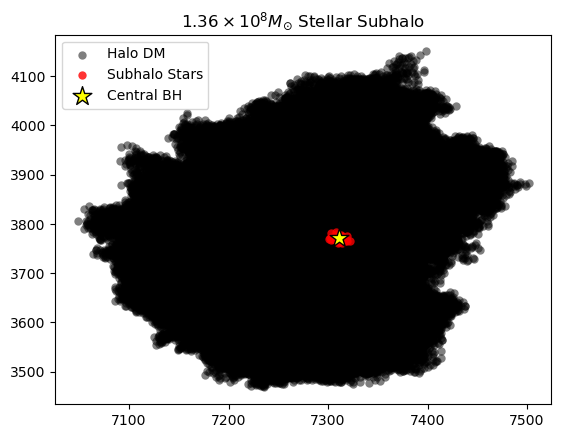

In [7]:
# Plot their positions.

plt.scatter(DMCoordinates_group[:,0],DMCoordinates_group[:,1],marker='o',linewidth=0,alpha=0.5,color='black',label='Halo DM')

plt.scatter(StarCoordinates_subhalo[:,0],StarCoordinates_subhalo[:,1],marker='o',linewidth=0,alpha=0.8,color='red',label='Subhalo Stars')

plt.scatter(BHcoord[0],BHcoord[1],color='yellow',edgecolor='black',s=200,marker = '*',label='Central BH')

plt.title(r'$1.36 \times 10^{8} M_{\odot}$ Stellar Subhalo')

plt.legend()

plt.savefig('Subgroup100.png')

In [8]:
#-----------------Path of the simulation----------------
path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output

#----------------Assign redshift snapshot and particle type we want to select
desired_redshift=0
p_type1=4       # Grabbing stellar particles
p_type2=0       # Grabbing DM particles
p_type3=5       # Grabbing BH pparticles

#----------------Get the subhalo catalog and select only those subhalos that have enough stars
SubhaloLenType,o = arepo_package.get_subhalo_property(basePath,'SubhaloLenType',desired_redshift,postprocessed=1)
SubhaloSMLen = SubhaloLenType[:,p_type1]
SubhaloIndices = numpy.arange(0,len(SubhaloSMLen))
mask= SubhaloSMLen>100
SubhaloIndicesWithStars = SubhaloIndices[mask]

#---------------Select the desired index on the masked catalog, 
desired_index = 200 # Randomly selecting an index

#---------------Assign the true index of the subhalo to be selected 
ActualSubhaloIndex = SubhaloIndicesWithStars[desired_index]

#---------------Retrieve the coordinates of the subhalo and the coordinates of the parent group
StarCoordinates_subhalo,StarCoordinates_group,Staroutput_redshift=arepo_package.get_particle_property_within_postprocessed_groups(basePath,'Coordinates',p_type1,desired_redshift,ActualSubhaloIndex,store_all_offsets=1,group_type='subhalo')
DMCoordinates_subhalo,DMCoordinates_group,DMoutput_redshift=arepo_package.get_particle_property_within_postprocessed_groups(basePath,'Coordinates',p_type2,desired_redshift,ActualSubhaloIndex,store_all_offsets=1,group_type='subhalo')
BHCoordinates_subhalo,BHCoordinates_group,BHoutput_redshift=arepo_package.get_particle_property_within_postprocessed_groups(basePath,'Coordinates',p_type3,desired_redshift,ActualSubhaloIndex,store_all_offsets=1,group_type='subhalo')
BHMasses_subhalo,BHMasses_group,BHoutput_redshift=arepo_package.get_particle_property_within_postprocessed_groups(basePath,'Masses',p_type3,desired_redshift,ActualSubhaloIndex,store_all_offsets=1,group_type='subhalo')

SubHaloMass,o = arepo_package.get_subhalo_property(basePath,'SubhaloMassType',desired_redshift,postprocessed=1)
SubhaloStellarMass = SubHaloMass[:,4][ActualSubhaloIndex]*1e10/h

BHcoord=BHCoordinates_subhalo[np.argmax(BHMasses_subhalo)]

print(SubhaloStellarMass*1e-8)

offsets were already there
offsets were already there
offsets were already there
offsets were already there
2.0102299430886306


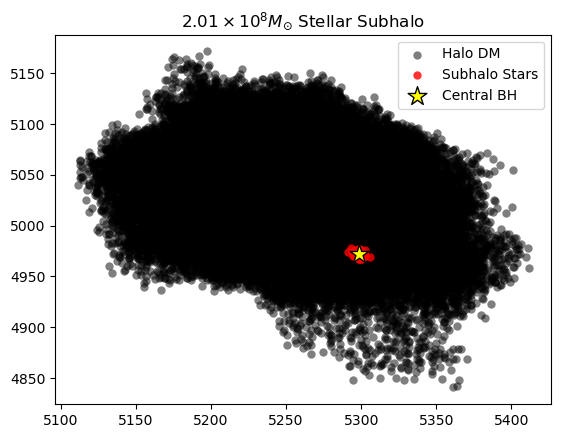

In [9]:
# Plot their positions.

plt.scatter(DMCoordinates_group[:,0],DMCoordinates_group[:,1],marker='o',linewidth=0,alpha=0.5,color='black',label='Halo DM')

plt.scatter(StarCoordinates_subhalo[:,0],StarCoordinates_subhalo[:,1],marker='o',linewidth=0,alpha=0.8,color='red',label='Subhalo Stars')

plt.scatter(BHcoord[0],BHcoord[1],color='yellow',edgecolor='black',s=200,marker = '*',label='Central BH')

plt.title(r'$2.01 \times 10^{8} M_{\odot}$ Stellar Subhalo')

plt.legend()

plt.savefig('Subgroup200.png')

In [10]:
#-----------------Path of the simulation----------------
path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output

#----------------Assign redshift snapshot and particle type we want to select
desired_redshift=0
p_type1=4       # Grabbing stellar particles
p_type2=0       # Grabbing DM particles
p_type3=5       # Grabbing BH pparticles

#----------------Get the subhalo catalog and select only those subhalos that have enough stars
SubhaloLenType,o = arepo_package.get_subhalo_property(basePath,'SubhaloLenType',desired_redshift,postprocessed=1)
SubhaloSMLen = SubhaloLenType[:,p_type1]
SubhaloIndices = numpy.arange(0,len(SubhaloSMLen))
mask= SubhaloSMLen>100
SubhaloIndicesWithStars = SubhaloIndices[mask]

#---------------Select the desired index on the masked catalog, 
desired_index = 300 # Randomly selecting an index

#---------------Assign the true index of the subhalo to be selected 
ActualSubhaloIndex = SubhaloIndicesWithStars[desired_index]

#---------------Retrieve the coordinates of the subhalo and the coordinates of the parent group
StarCoordinates_subhalo,StarCoordinates_group,Staroutput_redshift=arepo_package.get_particle_property_within_postprocessed_groups(basePath,'Coordinates',p_type1,desired_redshift,ActualSubhaloIndex,store_all_offsets=1,group_type='subhalo')
DMCoordinates_subhalo,DMCoordinates_group,DMoutput_redshift=arepo_package.get_particle_property_within_postprocessed_groups(basePath,'Coordinates',p_type2,desired_redshift,ActualSubhaloIndex,store_all_offsets=1,group_type='subhalo')
BHCoordinates_subhalo,BHCoordinates_group,BHoutput_redshift=arepo_package.get_particle_property_within_postprocessed_groups(basePath,'Coordinates',p_type3,desired_redshift,ActualSubhaloIndex,store_all_offsets=1,group_type='subhalo')
BHMasses_subhalo,BHMasses_group,BHoutput_redshift=arepo_package.get_particle_property_within_postprocessed_groups(basePath,'Masses',p_type3,desired_redshift,ActualSubhaloIndex,store_all_offsets=1,group_type='subhalo')

SubHaloMass,o = arepo_package.get_subhalo_property(basePath,'SubhaloMassType',desired_redshift,postprocessed=1)
SubhaloStellarMass = SubHaloMass[:,4][ActualSubhaloIndex]*1e10/h

BHcoord=BHCoordinates_subhalo[np.argmax(BHMasses_subhalo)]

print(SubhaloStellarMass*1e-8)

offsets were already there
offsets were already there
offsets were already there
offsets were already there
9.912938090739152


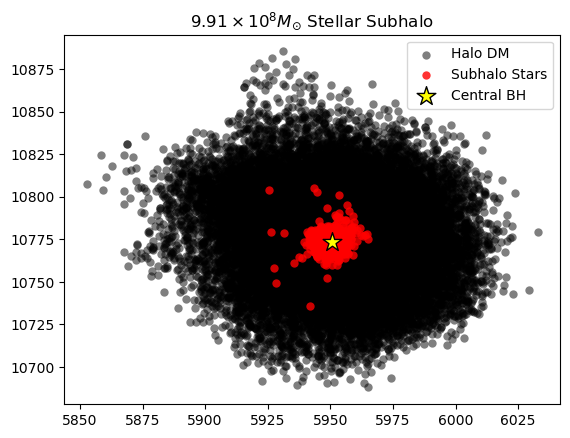

In [11]:
# Plot their positions.

plt.scatter(DMCoordinates_group[:,0],DMCoordinates_group[:,1],marker='o',linewidth=0,alpha=0.5,color='black',label='Halo DM')

plt.scatter(StarCoordinates_subhalo[:,0],StarCoordinates_subhalo[:,1],marker='o',linewidth=0,alpha=0.8,color='red',label='Subhalo Stars')

plt.scatter(BHcoord[0],BHcoord[1],color='yellow',edgecolor='black',s=200,marker = '*',label='Central BH')

plt.title(r'$9.91 \times 10^{8} M_{\odot}$ Stellar Subhalo')

plt.legend()

plt.savefig('Subgroup300.png')

# Plotting M-sigma!

In [2]:
path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output

desired_redshift=0

SubhaloLenType,o = arepo_package.get_subhalo_property(basePath,'SubhaloLenType',desired_redshift,postprocessed=1)
SubhaloBHLen = SubhaloLenType[:,5]
SubhaloStarsLen = SubhaloLenType[:,4]


In [2]:
import time

path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs
output='output_ratio10_SFMFGM5_seed5.00_bFOF/'
basePath=path_to_output+run+output

N = 10
indices = np.arange(0,N)
desired_redshift = 0

start_time = time.time()
M,MStars,Sigma,VelsMag,Velocities,NStars,BH_progs,IgnoredBhs = M_Sigma(basePath,desired_redshift,desired_indices=indices)
end_time = time.time()

t_per_halo = (end_time-start_time)/N

In [3]:
Write2File(M,MStars,Sigma,VelsMag,Velocities,NStars,BH_progs,IgnoredBhs)

In [4]:
Data=ReadBrahmaData()

# Testing python script for errors:

In [12]:
MStars_subhalo=np.array([1,1,1])
Vel_BH=np.array([[2,1,3],[4,6,1],[4,3,2]])
Vel_CM=Vel_BH/2
mu_BH = np.mean(Vel_BH,axis=0) # Average 3D stellar velocity for this subhalo
mu_CM = np.mean(Vel_CM,axis=0)
Mstars_total=np.sum(MStars_subhalo)
N=len(MStars_subhalo)

# Here we weight the sigma calculation by stellar mass
BHDiffSquared=MStars_subhalo[:, np.newaxis]*np.array((Vel_BH - mu_BH)** 2)
CMDiffSquared=MStars_subhalo[:, np.newaxis]*np.array((Vel_CM - mu_CM)** 2)

Sigma_BH = np.sqrt(np.sum(BHDiffSquared,axis=0) / Mstars_total)  # Calculate sigma from subhalo velocity
Sigma_CM = np.sqrt(np.sum(CMDiffSquared,axis=0) / Mstars_total)  # Calculate sigma from BH velocity

Sigma_unweighted=np.sqrt(np.sum((Vel_BH-mu_BH)**2,axis=0) / N)

print("Weighted Sigmas:",Sigma_BH,Sigma_CM)
print("Unweighted:",Sigma_unweighted)

Weighted Sigmas: [0.94280904 2.05480467 0.81649658] [0.47140452 1.02740233 0.40824829]
Unweighted: [0.94280904 2.05480467 0.81649658]


/tmp/ipykernel_577337/3985576248.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(WeightedData[4])[:,0],np.log10(WeightedData[0]),s=1.5)


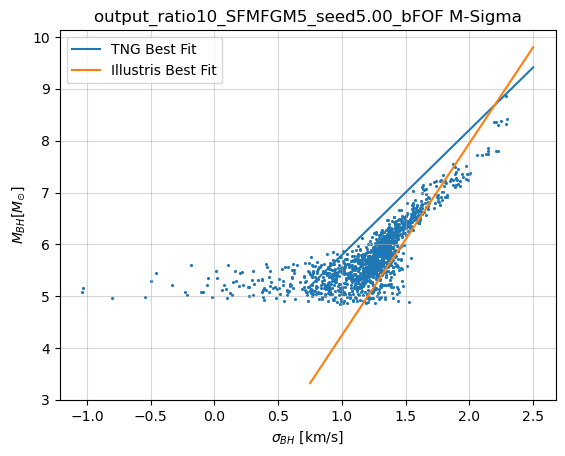

In [6]:
WeightedData=ReadBrahmaData('BrahmaData_M_weighted')
plt.scatter(np.log10(WeightedData[4])[:,0],np.log10(WeightedData[0]),s=1.5)
plt.plot(x,TNGy[0],label='TNG Best Fit')
plt.plot(x,y[0],label='Illustris Best Fit')
plt.xlabel('$\sigma_{BH}$ [km/s]')
plt.ylabel('$M_{BH} [M_{\odot}]$')
#plt.xlim(1.5,2.75)
#plt.ylim(5.5,10.5)
plt.grid(alpha=0.5)
plt.legend()
plt.title('output_ratio10_SFMFGM5_seed5.00_bFOF M-Sigma')
plt.savefig('output_ratio10_SFMFGM5_seed5.00_M_Sigma_BH_weighted.png')

## Testing with loaded data:

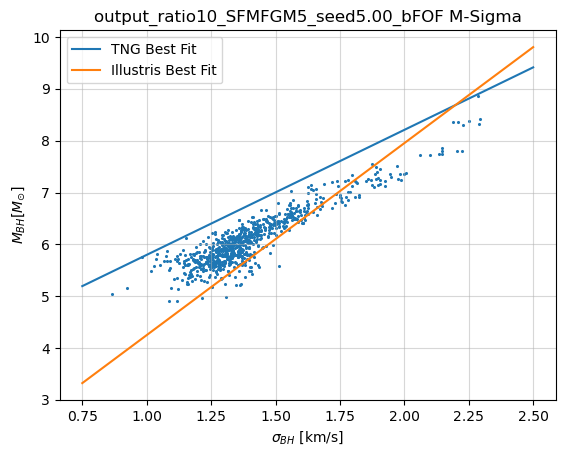

In [17]:
New_bFOF_z0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z0')

plt.scatter(np.log10(New_bFOF_z0[5])[:,0],np.log10(New_bFOF_z0[0]),s=1.5)
plt.plot(x,TNGy[0],label='TNG Best Fit')
plt.plot(x,y[0],label='Illustris Best Fit')
plt.xlabel('$\sigma_{BH}$ [km/s]')
plt.ylabel('$M_{BH} [M_{\odot}]$')
#plt.xlim(1.5,2.75)
#plt.ylim(5.5,10.5)
plt.grid(alpha=0.5)
plt.legend()
plt.title('output_ratio10_SFMFGM5_seed5.00_bFOF M-Sigma')
plt.savefig('output_ratio10_SFMFGM5_seed5.00_bFOF_z0_10stars.png')

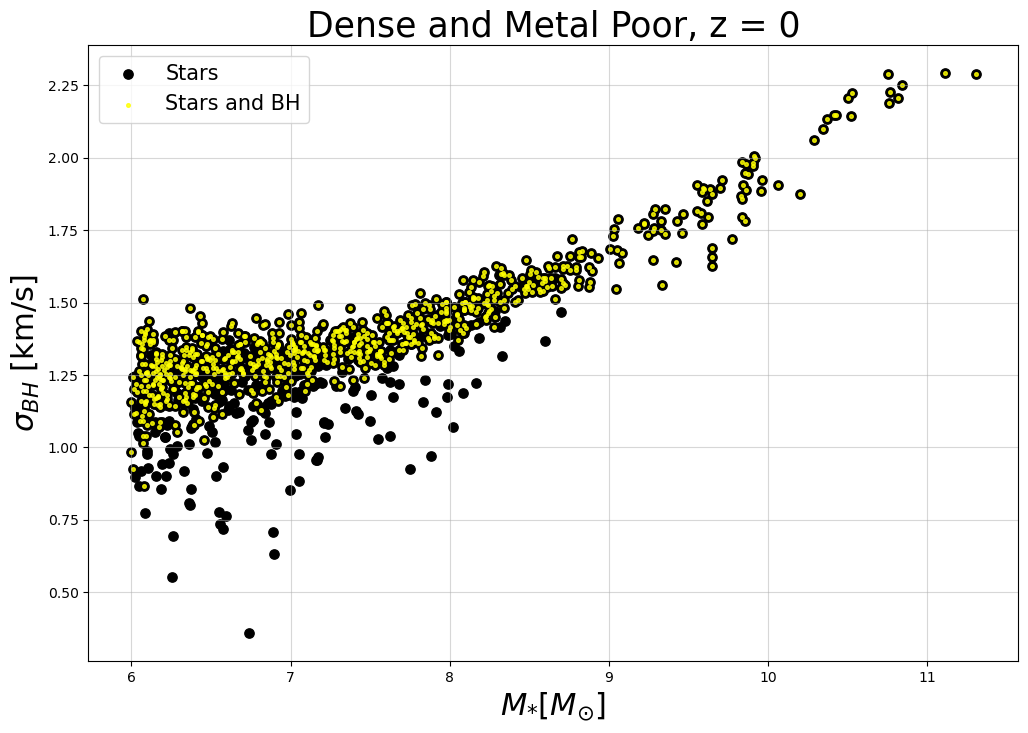

In [67]:
MstarsBH = [np.sum(New_bFOF_z0[1][i]) for i in range(len(New_bFOF_z0[1]))]
Mstars = [np.sum(New_bFOF_z0[2][i]) for i in range(len(New_bFOF_z0[2]))]

plt.figure(figsize=(12,8))
plt.scatter(np.log10(Mstars),np.log10(New_bFOF_z0[6])[:,0],s=45,color='black',label='Stars')
plt.scatter(np.log10(MstarsBH),np.log10(New_bFOF_z0[5])[:,0],s=7,color='yellow',marker='o',label = 'Stars and BH',alpha=0.8)
plt.legend(fontsize=15)
plt.grid(alpha=0.5)

plt.title('Dense and Metal Poor, z = 0',size=25)
plt.xlabel('$M_{*} [M_{\odot}]$',size=22)
plt.ylabel('$\sigma_{BH}$ [km/s]',size=22)

plt.savefig('output_ratio10_SFMFGM5_seed5.00_bFOF_z0_Mstar_sigma.png')

In [2]:
Data2=ReadBrahmaData('output_ratio10_SFMFGM5_seed5.00_bFOF_z5')

In [3]:
WeightedData=ReadBrahmaData('Brahma_Data/BrahmaData_M_weighted')

/tmp/ipykernel_317524/533693023.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(sigmax2),np.log10(Data2[0]),s=1.5,label="z=5",alpha=0.5)
/tmp/ipykernel_317524/533693023.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(sigmax1),np.log10(WeightedData[0]),s=1.5,label="z=0",alpha=0.5)


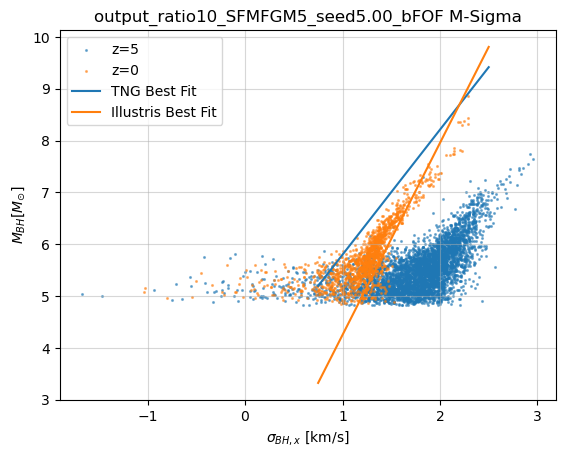

In [8]:
sigmax1=[sigma[0] for sigma in WeightedData[4]]
sigmax2=[sigma[0] for sigma in Data2[4]]
plt.scatter(np.log10(sigmax2),np.log10(Data2[0]),s=1.5,label="z=5",alpha=0.5)
plt.scatter(np.log10(sigmax1),np.log10(WeightedData[0]),s=1.5,label="z=0",alpha=0.5)
plt.plot(x,TNGy[0],label='TNG Best Fit')
plt.plot(x,y[0],label='Illustris Best Fit')
plt.xlabel('$\sigma_{BH,x}$ [km/s]')
plt.ylabel('$M_{BH} [M_{\odot}]$')

plt.grid(alpha=0.5)
plt.legend()
plt.title('output_ratio10_SFMFGM5_seed5.00_bFOF M-Sigma')
plt.savefig('output_ratio10_SFMFGM5_seed5.00_M_Sigma_BH_z5,0.png')

Text(0.5, 1.0, 'output_ratio10_SFMFGM5_seed5.00_bFOF MBH-MStars')

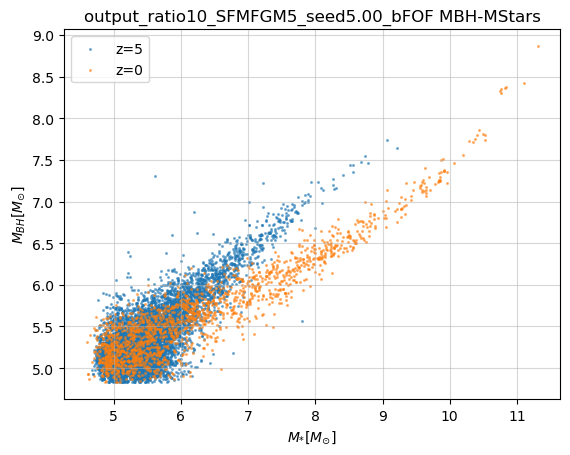

In [17]:
M2 = np.array([np.sum(i) for i in Data2[1]])
M1 = np.array([np.sum(i) for i in WeightedData[1]])

plt.scatter(np.log10(M2),np.log10(Data2[0]),s=1.5,label="z=5",alpha=0.5)
plt.scatter(np.log10(M1),np.log10(WeightedData[0]),s=1.5,label="z=0",alpha=0.5)
#plt.plot(x,TNGy[0],label='TNG Best Fit')
#plt.plot(x,y[0],label='Illustris Best Fit')
plt.xlabel('$M_{*} [M_{\odot}]$')
plt.ylabel('$M_{BH} [M_{\odot}]$')

plt.grid(alpha=0.5)
plt.legend()
plt.title('output_ratio10_SFMFGM5_seed5.00_bFOF MBH-MStars')
# plt.savefig('output_ratio10_SFMFGM5_seed5.00_M_Sigma_BH_z5,0.png')

Text(0.5, 1.0, 'output_ratio10_SFMFGM5_seed5.00_bFOF M-Sigma')

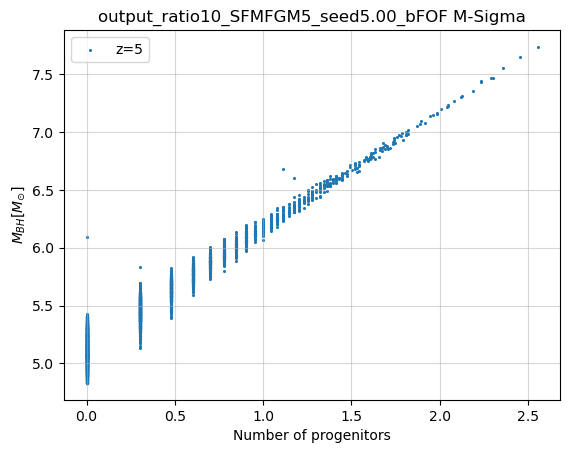

In [24]:
plt.scatter(np.log10(Data[10]),np.log10(Data[0]),s=1.5,label="z=5")
plt.xlabel('Number of progenitors')
plt.ylabel('$M_{BH} [M_{\odot}]$')

plt.grid(alpha=0.5)
plt.legend()
plt.title('output_ratio10_SFMFGM5_seed5.00_bFOF M-Sigma')
# plt.savefig('output_ratio10_SFMFGM5_seed5.00_M_Sigma_BH.png')

# Comparing with Illustris TNG

In [25]:
bFOF=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z0')
TNGz0=ReadBrahmaData('Brahma_Data/TNG_z0')

# Grabbing x-sigma values
sigmaxTNG=np.array([sigma[0] for sigma in TNGz0[4]])
sigmax1=np.array([sigma[0] for sigma in bFOF[5]])

# Getting rid of nonzero values
# nonzero1 = np.nonzero(sigmax1)[0]
# sigmaxTNG=sigmax1[nonzero1]

M_TNGz0 = np.array(TNGz0[0])
M_bFOF = np.array(bFOF[0])

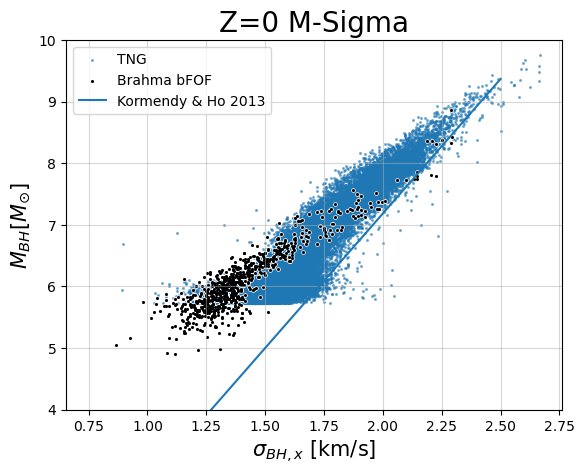

In [28]:
plt.scatter(np.log10(sigmaxTNG),np.log10(M_TNGz0),s=1.5,label="TNG",alpha=0.5)
plt.scatter(np.log10(sigmax1),np.log10(M_bFOF),s=5,color='white',alpha=1)
plt.scatter(np.log10(sigmax1),np.log10(M_bFOF),s=1.5,label="Brahma bFOF",color='black',alpha=1)
plt.plot(xfit,KH13_yfit[0],label='Kormendy & Ho 2013')

plt.xlabel('$\sigma_{BH,x}$ [km/s]',size=15)
plt.ylabel('$M_{BH} [M_{\odot}]$',size=15)

plt.ylim(4,10)
plt.grid(alpha=0.5)
plt.legend(fontsize=10)
    
plt.title('Z=0 M-Sigma',size=20)

plt.savefig('Z0_TNG_bFOF_comparison.png')

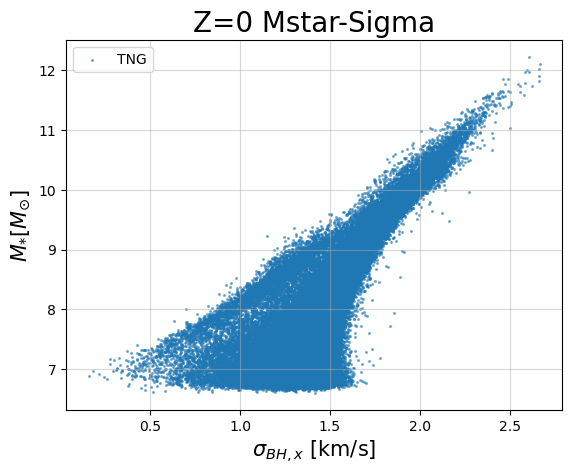

In [2]:
TNGz0=ReadBrahmaData('Brahma_Data/TNG_z0')

# Grabbing x-sigma values
sigmax1=np.array([sigma[0] for sigma in TNGz0[3]])

# Getting rid of nonzero values
nonzero1 = np.nonzero(sigmax1)[0]

sigmax1=sigmax1[nonzero1]

Mstars_total = [np.sum(i) for i in TNGz0[1]]

MStar_TNGz0 = np.array(Mstars_total)[nonzero1]

# Plotting
plt.scatter(np.log10(sigmax1),np.log10(MStar_TNGz0),s=1.5,label="TNG",alpha=0.5)

# plt.plot(x,TNGy[0],label='TNG Best Fit')
# plt.plot(x,y[0],label='Illustris Best Fit')
plt.xlabel('$\sigma_{BH,x}$ [km/s]',size=15)
plt.ylabel('$M_{*} [M_{\odot}]$',size=15)
# plt.ylim()
plt.grid(alpha=0.5)
plt.legend(fontsize=10)
    
plt.title('Z=0 Mstar-Sigma',size=20)

plt.savefig('Z0_TNG_Mstar_Sigma.png')

## Need to request more memory or run slurm script for TNG data

# Comparing different Brahma boxes!

In [47]:
bFOFz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z5')
LW10z5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z5')
spinz5 = ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z5')
spin_richz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z5')

sigmax1=np.array([sigma[0] for sigma in spin_richz5[4]])
np.count_nonzero(sigmax1)/len(sigmax1)

0.9784366576819407

In [48]:
zeroids = np.where(sigmax1==0)[0]

Mstars = [spin_richz5[1][i] for i in zeroids]
Mstars

[array([148221.66], dtype=float32),
 array([144393.47], dtype=float32),
 array([101743.086], dtype=float32),
 array([109555.445], dtype=float32),
 array([102019.47], dtype=float32),
 array([121011.5], dtype=float32),
 array([122673.19], dtype=float32),
 array([132830.88], dtype=float32)]

In [49]:
bFOFz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z0')
LW10z0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z0')
spinz0 = ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z0')
spin_richz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z0')

sigmax1=np.array([sigma[2] for sigma in bFOFz0[4]])
np.count_nonzero(sigmax1)/len(sigmax1)

0.79399884593191

In [51]:
zeroids = np.where(sigmax1==0)[0]

Mstars = [bFOFz0[1][i] for i in zeroids]
# Mstars

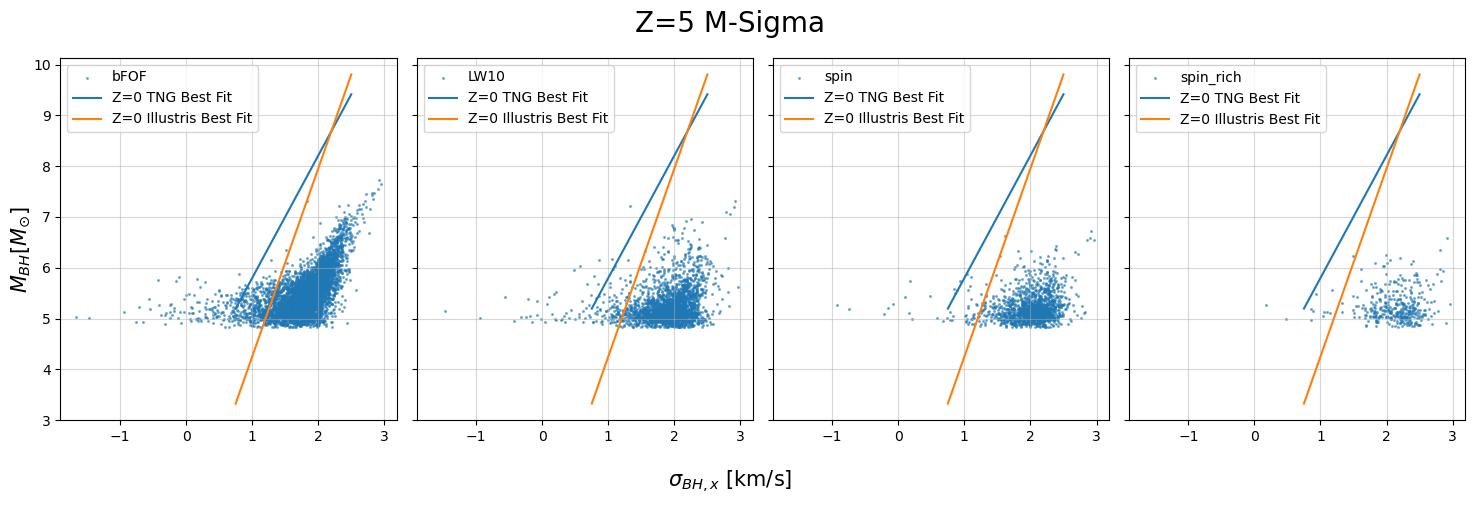

In [15]:
bFOFz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z5')
LW10=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z5')
spin = ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z5')
spin_rich=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z5')

# Grabbing x-sigma values
sigmax1=np.array([sigma[0] for sigma in bFOFz5[4]])
sigmax2=np.array([sigma[0] for sigma in LW10[4]])
sigmax3=np.array([sigma[0] for sigma in spin[4]])
sigmax4=np.array([sigma[0] for sigma in spin_rich[4]])

# Getting rid of nonzero values
nonzero1 = np.nonzero(sigmax1)[0]
nonzero2 = np.nonzero(sigmax2)[0]
nonzero3 = np.nonzero(sigmax3)[0]
nonzero4 = np.nonzero(sigmax4)[0]

sigmax1=sigmax1[nonzero1]
sigmax2=sigmax1[nonzero2]
sigmax3=sigmax1[nonzero3]
sigmax4=sigmax1[nonzero4]

M_bFOF = np.array(bFOFz5[0])[nonzero1]
M_LW10 = np.array(LW10[0])[nonzero2]
M_spin = np.array(spin[0])[nonzero3]
M_spin_rich = np.array(spin_rich[0])[nonzero4]

# Plotting
f,axs = plt.subplots(1,4,sharey = True,sharex=True,figsize = (15,5))

axs[0].scatter(np.log10(sigmax1),np.log10(M_bFOF),s=1.5,label="bFOF",alpha=0.5)
axs[1].scatter(np.log10(sigmax2),np.log10(M_LW10),s=1.5,label="LW10",alpha=0.5)
axs[2].scatter(np.log10(sigmax3),np.log10(M_spin),s=1.5,label="spin",alpha=0.5)
axs[3].scatter(np.log10(sigmax4),np.log10(M_spin_rich),s=1.5,label="spin_rich",alpha=0.5)

# plt.plot(x,TNGy[0],label='TNG Best Fit')
# plt.plot(x,y[0],label='Illustris Best Fit')
f.supxlabel('$\sigma_{BH,x}$ [km/s]',size=15)
f.supylabel('$M_{BH} [M_{\odot}]$',size=15)

for ax in axs:
    ax.grid(alpha=0.5)
    ax.plot(x,TNGy[0],label='Z=0 TNG Best Fit')
    ax.plot(x,y[0],label='Z=0 Illustris Best Fit')
    ax.legend(fontsize=10)
    
f.suptitle('Z=5 M-Sigma',size=20)
f.tight_layout()

plt.savefig('Z5_Comparison.png')

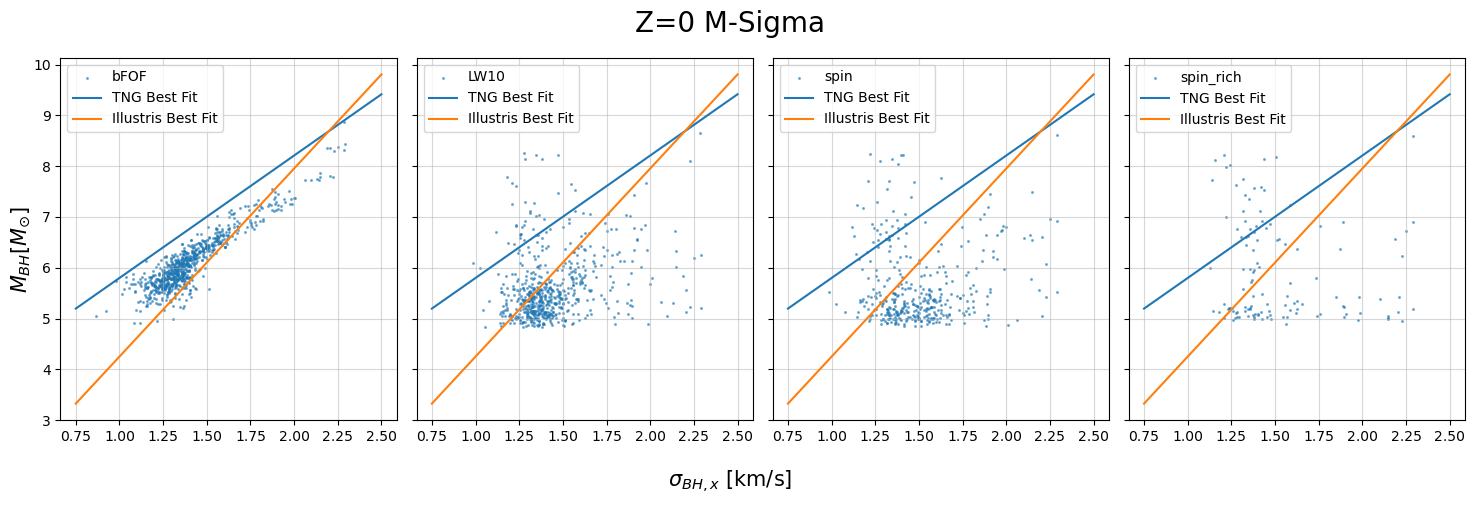

In [5]:
bFOF=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z0')
LW10=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z0')
spin = ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z0')
spin_rich=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z0')

# Grabbing x-sigma values
sigmax1=np.array([sigma[0] for sigma in bFOF[5]])
sigmax2=np.array([sigma[0] for sigma in LW10[5]])
sigmax3=np.array([sigma[0] for sigma in spin[5]])
sigmax4=np.array([sigma[0] for sigma in spin_rich[5]])

# Getting rid of nonzero values
nonzero1 = np.nonzero(sigmax1)[0]
nonzero2 = np.nonzero(sigmax2)[0]
nonzero3 = np.nonzero(sigmax3)[0]
nonzero4 = np.nonzero(sigmax4)[0]

sigmax1=sigmax1[nonzero1]
sigmax2=sigmax1[nonzero2]
sigmax3=sigmax1[nonzero3]
sigmax4=sigmax1[nonzero4]

M_bFOF = np.array(bFOF[0])[nonzero1]
M_LW10 = np.array(LW10[0])[nonzero2]
M_spin = np.array(spin[0])[nonzero3]
M_spin_rich = np.array(spin_rich[0])[nonzero4]

# Plotting
f,axs = plt.subplots(1,4,sharey = True,sharex=True,figsize = (15,5))

axs[0].scatter(np.log10(sigmax1),np.log10(M_bFOF),s=1.5,label="bFOF",alpha=0.5)
axs[1].scatter(np.log10(sigmax2),np.log10(M_LW10),s=1.5,label="LW10",alpha=0.5)
axs[2].scatter(np.log10(sigmax3),np.log10(M_spin),s=1.5,label="spin",alpha=0.5)
axs[3].scatter(np.log10(sigmax4),np.log10(M_spin_rich),s=1.5,label="spin_rich",alpha=0.5)

# plt.plot(x,TNGy[0],label='TNG Best Fit')
# plt.plot(x,y[0],label='Illustris Best Fit')
f.supxlabel('$\sigma_{BH,x}$ [km/s]',size=15)
f.supylabel('$M_{BH} [M_{\odot}]$',size=15)

for ax in axs:
    ax.grid(alpha=0.5)
    ax.plot(x,TNGy[0],label='TNG Best Fit')
    ax.plot(x,y[0],label='Illustris Best Fit')
    ax.legend(fontsize=10)
    
f.suptitle('Z=0 M-Sigma',size=20)
f.tight_layout()

plt.savefig('Z0_Comparison.png')

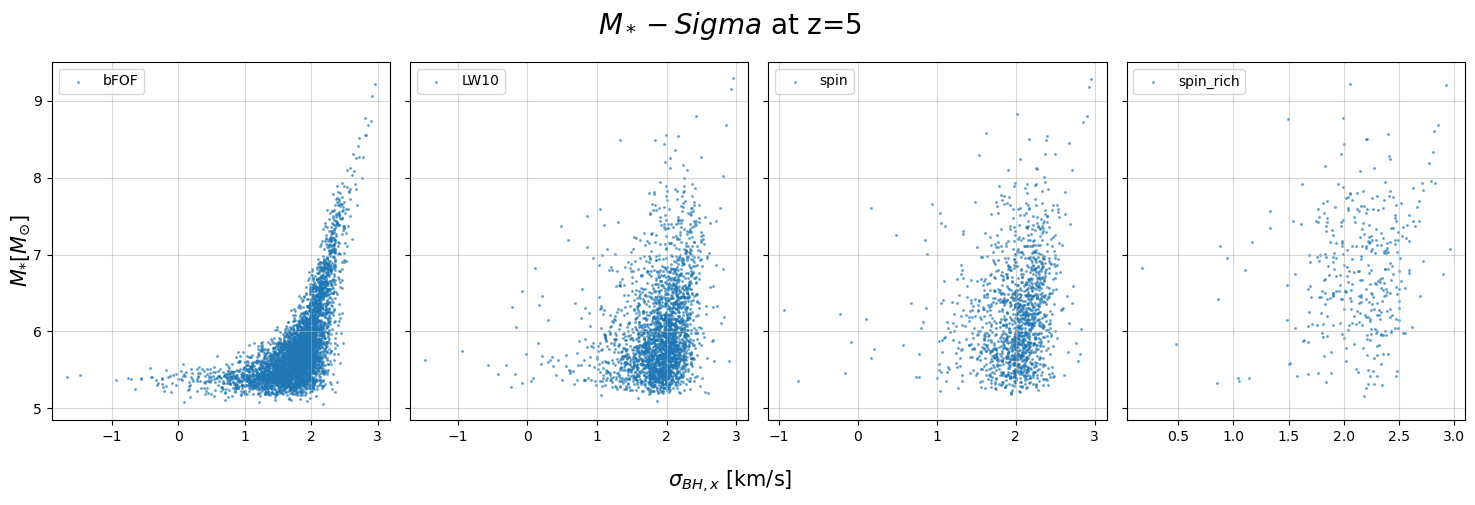

In [16]:
bFOFz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z5')
LW10z5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z5')
spinz5 = ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z5')
spin_richz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z5')

# Grabbing x-sigma values
sigmax1=np.array([sigma[0] for sigma in bFOFz5[4]])
sigmax2=np.array([sigma[0] for sigma in LW10z5[4]])
sigmax3=np.array([sigma[0] for sigma in spinz5[4]])
sigmax4=np.array([sigma[0] for sigma in spin_richz5[4]])

# Getting rid of nonzero values
nonzero1 = np.nonzero(sigmax1)[0]
nonzero2 = np.nonzero(sigmax2)[0]
nonzero3 = np.nonzero(sigmax3)[0]
nonzero4 = np.nonzero(sigmax4)[0]

sigmax1=sigmax1[nonzero1]
sigmax2=sigmax1[nonzero2]
sigmax3=sigmax1[nonzero3]
sigmax4=sigmax1[nonzero4]

Mstar_bFOF = np.array([np.sum(bFOFz5[1][i]) for i in range(len(bFOFz5[1]))])[nonzero1]
Mstar_LW10 = np.array([np.sum(LW10z5[1][i]) for i in range(len(LW10z5[1]))])[nonzero2]
Mstar_spin = np.array([np.sum(spinz5[1][i]) for i in range(len(spinz5[1]))])[nonzero3]
Mstar_spin_rich = np.array([np.sum(spin_richz5[1][i]) for i in range(len(spin_richz5[1]))])[nonzero4]

# Plotting
f,axs = plt.subplots(1,4,sharey = True,figsize = (15,5))

axs[0].scatter(np.log10(sigmax1),np.log10(Mstar_bFOF),s=1.5,label="bFOF",alpha=0.5)
axs[1].scatter(np.log10(sigmax2),np.log10(Mstar_LW10),s=1.5,label="LW10",alpha=0.5)
axs[2].scatter(np.log10(sigmax3),np.log10(Mstar_spin),s=1.5,label="spin",alpha=0.5)
axs[3].scatter(np.log10(sigmax4),np.log10(Mstar_spin_rich),s=1.5,label="spin_rich",alpha=0.5)

# plt.plot(x,TNGy[0],label='TNG Best Fit')
# plt.plot(x,y[0],label='Illustris Best Fit')
f.supxlabel('$\sigma_{BH,x}$ [km/s]',size=15)
f.supylabel('$M_{*} [M_{\odot}]$',size=15)

for ax in axs:
    ax.grid(alpha=0.5)
    ax.legend(fontsize=10)
    
f.suptitle('$M_*-Sigma$ at z=5',size=20)
f.tight_layout()

plt.savefig('Z5_Mstar_Sigma_Comparison.png')

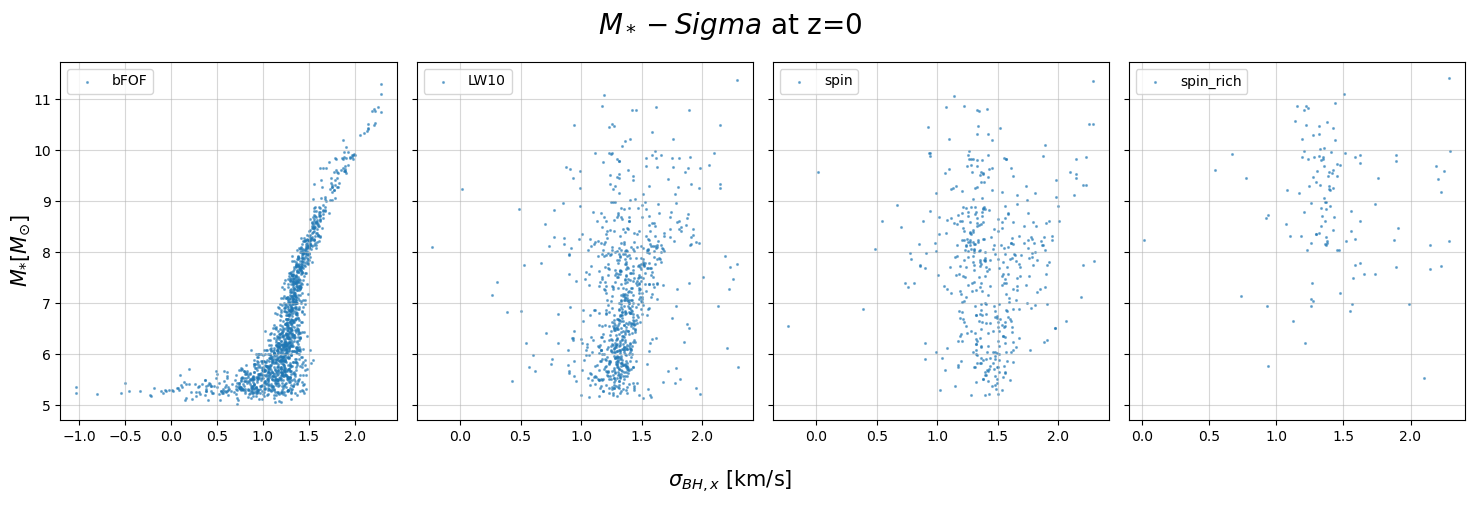

In [15]:
bFOFz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z0')
LW10z0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z0')
spinz0 = ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z0')
spin_richz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z0')

# Grabbing x-sigma values
sigmax1=np.array([sigma[0] for sigma in bFOFz0[4]])
sigmax2=np.array([sigma[0] for sigma in LW10z0[4]])
sigmax3=np.array([sigma[0] for sigma in spinz0[4]])
sigmax4=np.array([sigma[0] for sigma in spin_richz0[4]])

# Getting rid of nonzero values
nonzero1 = np.nonzero(sigmax1)[0]
nonzero2 = np.nonzero(sigmax2)[0]
nonzero3 = np.nonzero(sigmax3)[0]
nonzero4 = np.nonzero(sigmax4)[0]

sigmax1=sigmax1[nonzero1]
sigmax2=sigmax1[nonzero2]
sigmax3=sigmax1[nonzero3]
sigmax4=sigmax1[nonzero4]

Mstar_bFOF = np.array([np.sum(bFOFz0[1][i]) for i in range(len(bFOFz0[1]))])[nonzero1]
Mstar_LW10 = np.array([np.sum(LW10z0[1][i]) for i in range(len(LW10z0[1]))])[nonzero2]
Mstar_spin = np.array([np.sum(spinz0[1][i]) for i in range(len(spinz0[1]))])[nonzero3]
Mstar_spin_rich = np.array([np.sum(spin_richz0[1][i]) for i in range(len(spin_richz0[1]))])[nonzero4]

# Plotting
f,axs = plt.subplots(1,4,sharey = True,figsize = (15,5))

axs[0].scatter(np.log10(sigmax1),np.log10(Mstar_bFOF),s=1.5,label="bFOF",alpha=0.5)
axs[1].scatter(np.log10(sigmax2),np.log10(Mstar_LW10),s=1.5,label="LW10",alpha=0.5)
axs[2].scatter(np.log10(sigmax3),np.log10(Mstar_spin),s=1.5,label="spin",alpha=0.5)
axs[3].scatter(np.log10(sigmax4),np.log10(Mstar_spin_rich),s=1.5,label="spin_rich",alpha=0.5)

# plt.plot(x,TNGy[0],label='TNG Best Fit')
# plt.plot(x,y[0],label='Illustris Best Fit')
f.supxlabel('$\sigma_{BH,x}$ [km/s]',size=15)
f.supylabel('$M_{*} [M_{\odot}]$',size=15)

for ax in axs:
    ax.grid(alpha=0.5)
    ax.legend(fontsize=10)
    
f.suptitle('$M_*-Sigma$ at z=0',size=20)
f.tight_layout()

plt.savefig('Z0_Mstar_Sigma_Comparison.png')

In [5]:
print(len(bFOFz0),len(LW10z0),len(spinz0),len(richz0))

20 17 20 20


In [3]:
print(len(bFOFz5),len(LW10z5),len(spinz5),len(richz5))

17 20 20 20


In [2]:
bFOFz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z5')
LW10z5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z5')
spinz5 = ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z5')
richz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z5')

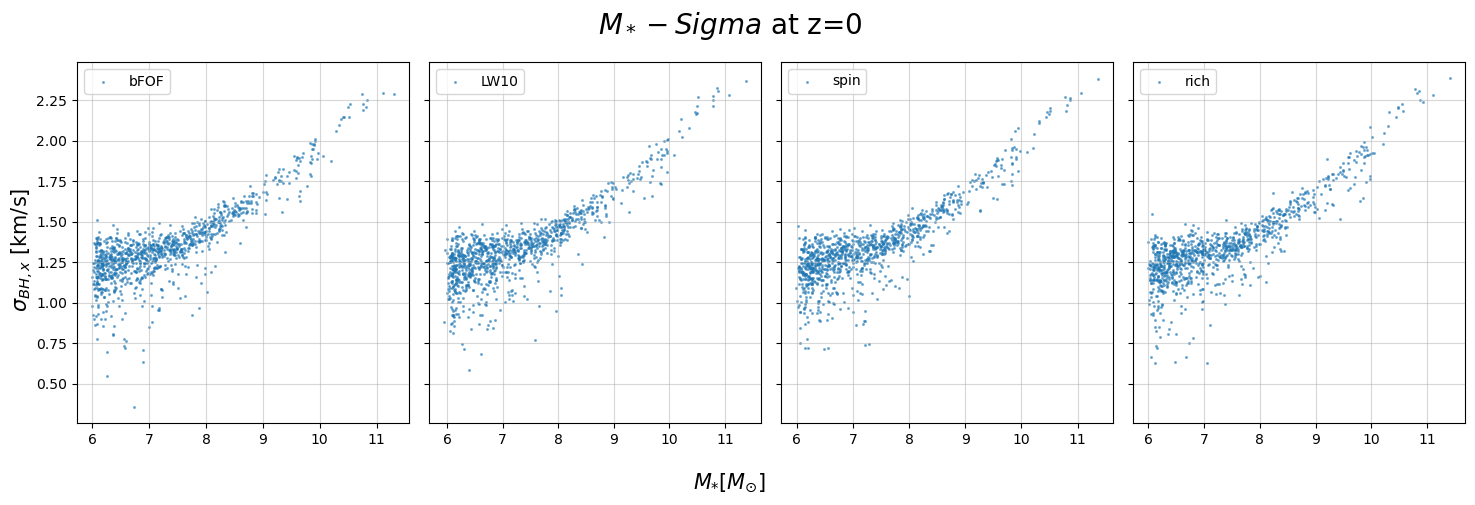

In [13]:
bFOFz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z0')
LW10z0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z0')
spinz0 = ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z0')
richz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z0')

MstarsbFOF = [np.sum(bFOFz0[2][i]) for i in range(len(bFOFz0[2]))]
MstarsLW10 = [np.sum(LW10z0[2][i]) for i in range(len(LW10z0[2]))]
Mstarsspin = [np.sum(spinz0[2][i]) for i in range(len(spinz0[2]))]
Mstarsrich = [np.sum(richz0[2][i]) for i in range(len(richz0[2]))]

# Plotting
f,axs = plt.subplots(1,4,sharey = True,figsize = (15,5))

axs[0].scatter(np.log10(MstarsbFOF),np.log10(bFOFz0[6])[:,0],s=1.5,label="bFOF",alpha=0.5)
axs[1].scatter(np.log10(MstarsLW10),np.log10(LW10z0[6])[:,0],s=1.5,label="LW10",alpha=0.5)
axs[2].scatter(np.log10(Mstarsspin),np.log10(spinz0[6])[:,0],s=1.5,label="spin",alpha=0.5)
axs[3].scatter(np.log10(Mstarsrich),np.log10(richz0[6])[:,0],s=1.5,label="rich",alpha=0.5)

# plt.plot(x,TNGy[0],label='TNG Best Fit')
# plt.plot(x,y[0],label='Illustris Best Fit')
f.supxlabel('$M_{*} [M_{\odot}]$',size=15)
f.supylabel('$\sigma_{BH,x}$ [km/s]',size=15)

for ax in axs:
    ax.grid(alpha=0.5)
    ax.legend(fontsize=10)
    
f.suptitle('$M_*-Sigma$ at z=0',size=20)
f.tight_layout()

plt.savefig('Z0_Mstar_Sigma_Comparison.png')

### Now plotting same as above, with subhalos with BHs highlighted

In [ ]:
MstarsBH = [np.sum(New_bFOF_z0[1][i]) for i in range(len(New_bFOF_z0[1]))]
Mstars = [np.sum(New_bFOF_z0[2][i]) for i in range(len(New_bFOF_z0[2]))]

plt.figure(figsize=(12,8))
plt.scatter(np.log10(Mstars),np.log10(New_bFOF_z0[6])[:,0],s=45,color='black',label='Stars')
plt.scatter(np.log10(MstarsBH),np.log10(New_bFOF_z0[5])[:,0],s=7,color='yellow',marker='o',label = 'Stars and BH',alpha=0.8)


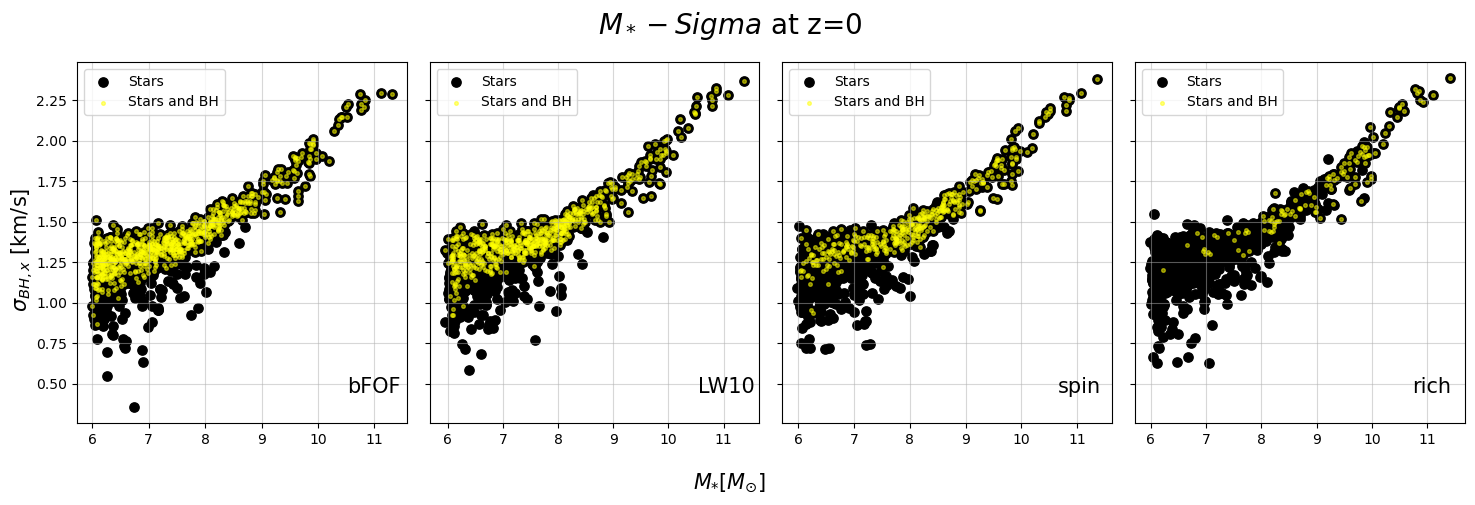

In [20]:
bFOFz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z0')
LW10z0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z0')
spinz0 = ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z0')
richz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z0')

MstarsbFOF = [np.sum(bFOFz0[2][i]) for i in range(len(bFOFz0[2]))]
MstarsLW10 = [np.sum(LW10z0[2][i]) for i in range(len(LW10z0[2]))]
Mstarsspin = [np.sum(spinz0[2][i]) for i in range(len(spinz0[2]))]
Mstarsrich = [np.sum(richz0[2][i]) for i in range(len(richz0[2]))]

MstarsbFOFBH = [np.sum(bFOFz0[1][i]) for i in range(len(bFOFz0[1]))]
MstarsLW10BH = [np.sum(LW10z0[1][i]) for i in range(len(LW10z0[1]))]
MstarsspinBH = [np.sum(spinz0[1][i]) for i in range(len(spinz0[1]))]
MstarsrichBH = [np.sum(richz0[1][i]) for i in range(len(richz0[1]))]

# Plotting
f,axs = plt.subplots(1,4,sharey = True,figsize = (15,5))

axs[0].scatter(np.log10(MstarsbFOF),np.log10(bFOFz0[6])[:,0],s=45,color='black',label="Stars")
axs[1].scatter(np.log10(MstarsLW10),np.log10(LW10z0[6])[:,0],s=45,color='black',label="Stars")
axs[2].scatter(np.log10(Mstarsspin),np.log10(spinz0[6])[:,0],s=45,color='black',label="Stars")
axs[3].scatter(np.log10(Mstarsrich),np.log10(richz0[6])[:,0],s=45,color='black',label="Stars")

axs[0].scatter(np.log10(MstarsbFOFBH),np.log10(bFOFz0[5])[:,0],s=7,color='yellow',label="Stars and BH",alpha=0.5)
axs[1].scatter(np.log10(MstarsLW10BH),np.log10(LW10z0[5])[:,0],s=7,color='yellow',label="Stars and BH",alpha=0.5)
axs[2].scatter(np.log10(MstarsspinBH),np.log10(spinz0[5])[:,0],s=7,color='yellow',label="Stars and BH",alpha=0.5)
axs[3].scatter(np.log10(MstarsrichBH),np.log10(richz0[5])[:,0],s=7,color='yellow',label="Stars and BH",alpha=0.5)

axs[0].text(0.9, 0.1, 'bFOF', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes,size=15)
axs[1].text(0.9, 0.1, 'LW10', horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes,size=15)
axs[2].text(0.9, 0.1, 'spin', horizontalalignment='center', verticalalignment='center', transform=axs[2].transAxes,size=15)
axs[3].text(0.9, 0.1, 'rich', horizontalalignment='center', verticalalignment='center', transform=axs[3].transAxes,size=15)

f.supxlabel('$M_{*} [M_{\odot}]$',size=15)
f.supylabel('$\sigma_{BH,x}$ [km/s]',size=15)

for ax in axs:
    ax.grid(alpha=0.5)
    ax.legend(fontsize=10)
    
f.suptitle('$M_*-Sigma$ at z=0',size=20)
f.tight_layout()

plt.savefig('Z0_Mstar_Sigma_Comparison_with_BH.png')

# Comparing to Illustris

Problematic subhalos: 16940-16943

In [27]:
SubhaloIndicesWithStars[np.where(SubhaloIndicesWithStars==16940)[0][0]+2]

16942

In [37]:
index=16947
Star_Props = il.snapshot.loadSubhalo(Illustrispath, snapNum=group, id=index, partType=4, fields=fields)

In [39]:
Illustrispath = '/standard/torrey-group/Illustris/Runs/L75n1820FP'

group=135
index=200

fields=['SubhaloLenType']
subhalos = il.groupcat.loadSubhalos(Illustrispath,group,fields=fields)

SubhaloBHLen = subhalos[:,5]
SubhaloStarsLen = subhalos[:,4]
SubhaloIndices = np.arange(0,len(SubhaloBHLen))
mask1 = np.logical_and(SubhaloBHLen>0,SubhaloStarsLen>10)  # Only subhalos with a BH and with 10 stars
mask2 = SubhaloStarsLen>10
SubhaloIndicesWithStars = SubhaloIndices[mask2]
SubhaloIndicesWithBH = SubhaloIndices[mask1]

fields = ['Masses','Velocities']

bad_indices=np.arange(16940,16944,1) # For some reason these Illustris subhalos won't load in

mask = np.isin(SubhaloIndicesWithStars, bad_indices, invert=True) # Removing these troublesome subhalos from our list manually
SubhaloIndicesWithStars=SubhaloIndicesWithStars[mask]

good_indices=[]

for index in SubhaloIndicesWithStars:
    
    good_indices.append(index)
    Star_Props = il.snapshot.loadSubhalo(Illustrispath, snapNum=group, id=index, partType=4, fields=fields)
    

KeyboardInterrupt: 